In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

In [38]:
obj1 = SkyCoord(263.75*u.deg, -17.9*u.deg)
obj2 = SkyCoord('20h24m59.9s', '10:6:0', unit=(u.hourangle, u.deg))

In [43]:
obj1.separation(obj2).value

50.444819053159335

In [45]:
angle = np.arccos(obj1.cartesian.dot(obj2.cartesian).value) * u.rad
angle.to('degree')

<Quantity 50.44481905 deg>

In [63]:
ra_1 = 30 + 15 * np.random.random(100)
dec_1 = 4 * (np.random.random(100) - 0.5)

ra_2 = 30 + 15 * np.random.random(100)
dec_2 = 4 * (np.random.random(100) - 0.5)

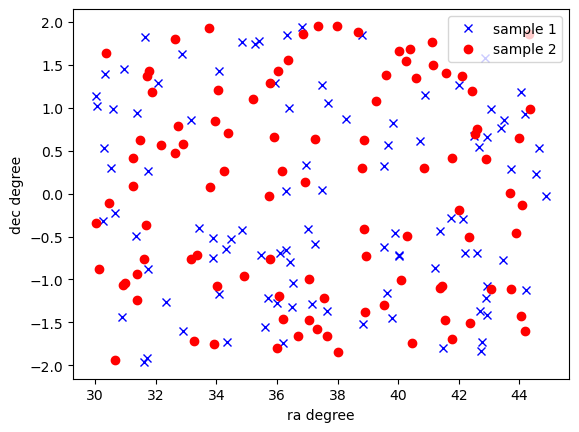

In [64]:
plt.plot(ra_1, dec_1, 'bx', label='sample 1')
plt.plot(ra_2, dec_2, 'ro', label='sample 2')
plt.xlabel('ra degree')
plt.ylabel('dec degree')
plt.legend()
plt.show()

In [74]:
sample_1 = SkyCoord(ra_1*u.deg, dec_1*u.deg)
sample_2 = SkyCoord(ra_2*u.deg, dec_2*u.deg)

id1, id2, _, _ = sample_1.search_around_sky(sample_2, (1./6)*u.deg)

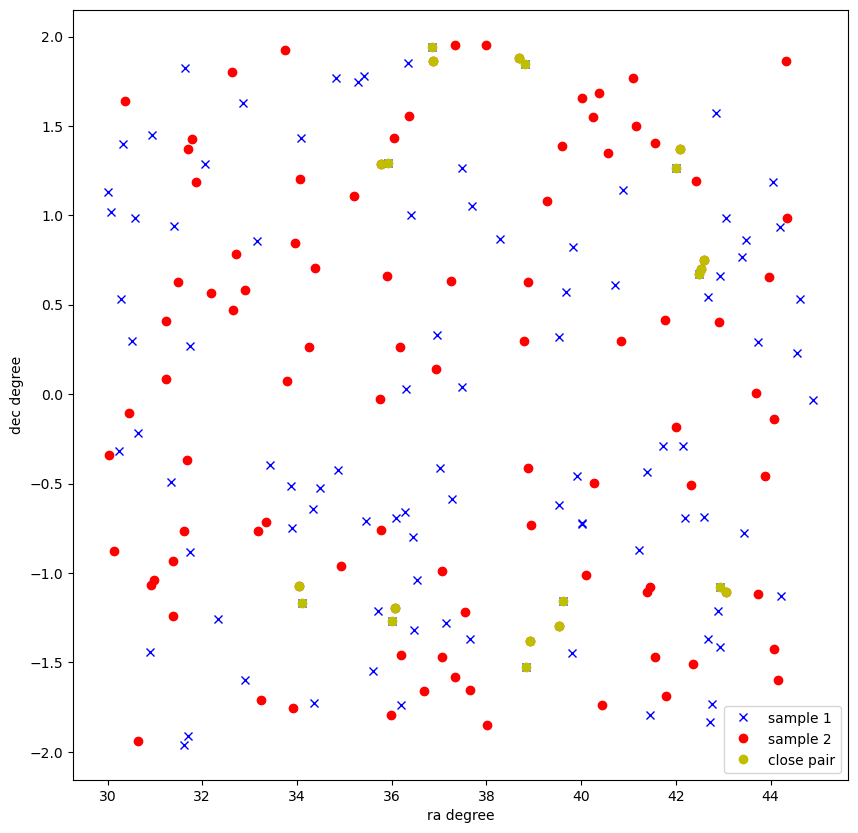

In [90]:
plt.figure(figsize=(10, 10))
plt.plot(ra_1, dec_1, 'bx', label='sample 1')
plt.plot(ra_2, dec_2, 'ro', label='sample 2')
plt.plot(ra_1[id2], dec_1[id2], 'yo', label='close pair')
plt.plot(ra_2[id1], dec_2[id1], 'yo')
plt.xlabel('ra degree')
plt.ylabel('dec degree')
plt.legend(fontsize=10, loc='lower right')
plt.show()

In [91]:
ra = np.concatenate([ra_1, ra_2])
dec = np.concatenate([dec_1, dec_2])

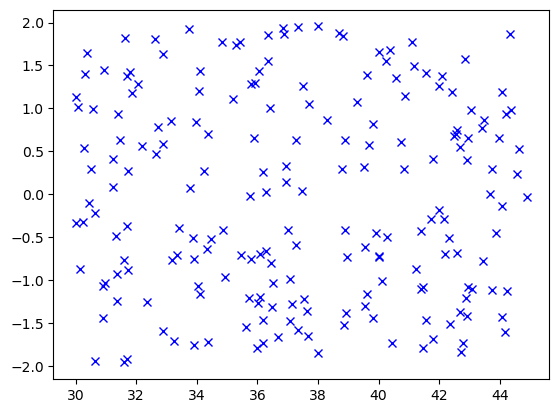

In [94]:
plt.plot(ra, dec, 'bx')
plt.show()

In [97]:
pos = SkyCoord('2h20m5s', '-0:6:12',  unit=(u.hourangle, u.deg))
sky_objects = SkyCoord(ra*u.deg, dec*u.deg)

select = pos.separation(sky_objects) < 1.8 * u.deg

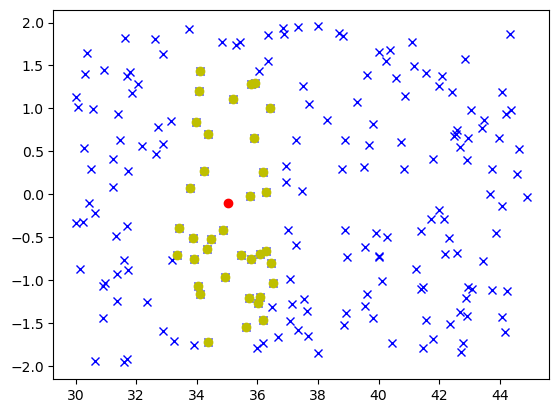

In [103]:
plt.plot(ra, dec, 'bx')
plt.plot(ra[select], dec[select], 'yo')
plt.plot(pos.ra.value, pos.dec.value, 'ro')
plt.show()